<a href="https://colab.research.google.com/github/Putra1688/MachineLearning-2025-22/blob/main/TG11_2341720248.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **⌚ JS11 - KLASIFIKASI 2**

<table border="1">
  <tr>
    <td>Nama</td>
    <td>: Rangga Dwi Saputra</td>
  </tr>
  <tr>
    <td>NIM</td>
    <td>: 2341720248</td>
  </tr>
</table>

# **🌃 PRAKTIKUM 5**
Klasifikasi Citra Siang dan Malang

## 0] Import Library

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/JS11-Klasifikasi 2/images/training/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/JS11-Klasifikasi 2/images/test/"

## 1] Load Data & Visualisasikan

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [ ]:
train_img[0]

(array([[[250, 255, 254],
         [250, 255, 254],
         [251, 255, 254],
         ...,
         [141, 129, 115],
         [171, 159, 145],
         [168, 156, 142]],
 
        [[250, 255, 254],
         [250, 255, 254],
         [251, 255, 254],
         ...,
         [153, 141, 127],
         [159, 147, 133],
         [164, 152, 138]],
 
        [[250, 255, 254],
         [250, 255, 254],
         [251, 255, 254],
         ...,
         [174, 162, 148],
         [158, 146, 132],
         [180, 168, 154]],
 
        ...,
 
        [[107,  96,  94],
         [ 74,  64,  62],
         [ 75,  64,  62],
         ...,
         [ 69,  70,  72],
         [ 74,  75,  77],
         [ 75,  76,  78]],
 
        [[111, 101,  99],
         [ 76,  68,  65],
         [ 82,  72,  70],
         ...,
         [ 94,  95,  97],
         [ 78,  79,  81],
         [ 79,  80,  82]],
 
        [[143, 135, 132],
         [ 97,  92,  88],
         [ 94,  86,  83],
         ...,
         [ 74,  75,  77],
  

Cek ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 113
(439, 640, 3)


Tampilkan gambar untuk inspeksi secara visual

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

visualisasi gambar secara acak

Shape	: (439, 640, 3)
Label	: night


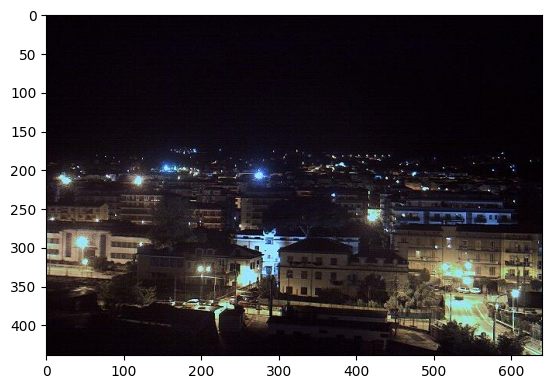

In [ ]:
random_img_viz(train_img)

## 3] Pra Pengolahan Data

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

fungsi untuk kebutuhan encoding label.

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

pra pengolahan data pada data training

In [ ]:
train_std_img_list = preprocess(train_img)

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 58
(600, 1100, 3)


## 4] Ekstraksi Fitur

fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

pengecekan pada gambar secara acak

Image 77
Avg Brighness: 195.1079


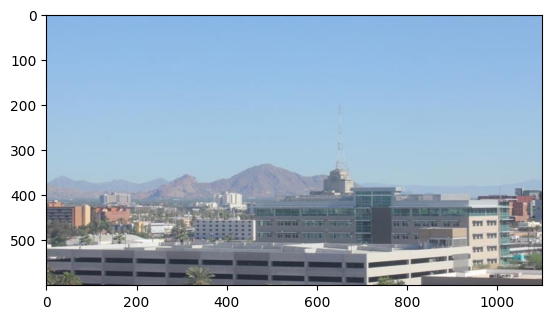

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## 5] Klasifikasi dengan Metode Treshold

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

pengecekan prediksi secara acak pada data training

Image 218
Actual label: 0
Predicted label: 0


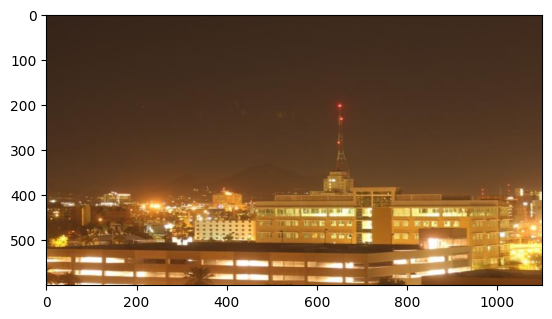

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## 6] Evaluasi Manual

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## === Klasifikasi dengan SVM (Alternatif) ===
Sebelumnya, hanya menggunakan threshold sebagai acuan. Cara ini mungkin tidak efektif dikarenakan harus menentukan threshold dengan tepat. Oleh karena itu, selanjutnya akan mencoba menggunakan model SVM untuk proses klasifikasi. Seluruh langkah yang digunakan serupa, hanya perlu mengubah mulai langkah ke-4.

## 4] Membuat Feature Vectors

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,154.102641,1.0
1,167.891992,1.0
2,137.345858,1.0
3,107.579145,1.0
4,136.946642,1.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,137.758344,1.0
1,151.116279,1.0
2,150.264005,1.0
3,156.924998,1.0
4,152.010606,1.0


## 5] Buat Model SVM


In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## 6] Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
